In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import kaggle
import seaborn as sns

In [2]:
!kaggle datasets download -d lava18/google-play-store-apps

google-play-store-apps.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
google = pd.read_csv('googleplaystore.csv')

## Inspecting the Data

In [4]:
google


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Dealing with duplicates

In [5]:
google = google.drop_duplicates('App')

In [6]:
google = google.rename(columns = {'Reviews': 'number_of_reviews'})

In [7]:
google[google.Category == '1.9']
google.drop(10472, inplace = True)

## Filling Null Values

In [9]:
columns_to_fill = ['Rating', 'Content Rating','Current Ver', 'Android Ver', 'Type']
google[columns_to_fill] = google[columns_to_fill].fillna(0)

In [10]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App                9659 non-null   object 
 1   Category           9659 non-null   object 
 2   Rating             9659 non-null   float64
 3   number_of_reviews  9659 non-null   object 
 4   Size               9659 non-null   object 
 5   Installs           9659 non-null   object 
 6   Type               9659 non-null   object 
 7   Price              9659 non-null   object 
 8   Content Rating     9659 non-null   object 
 9   Genres             9659 non-null   object 
 10  Last Updated       9659 non-null   object 
 11  Current Ver        9659 non-null   object 
 12  Android Ver        9659 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


## Dealing with the column 'Size'
* First we deal with the outliers or unnecessary string values that might skew with our calculation.
* after that we convert al the sizes in the form of kb to mb.
* Finally remove the mb and kb sign.

In [11]:
google['Size'] = google['Size'].replace('Varies with device', '0.0')

In [12]:
google['Size'] = google['Size'].str.replace(r'[^\d.]', '', regex=True)
kb_rows = google['Size'].str.endswith('k').fillna(False)
google.loc[kb_rows, 'Size'] = google.loc[kb_rows, 'Size'].str.strip('k').astype(float)/1000
google['Size'] = google['Size'].str.strip('M').astype(float)
google = google.rename(columns = {'Size': 'Size(Mb)'})
google

,App,Category,Rating,number_of_reviews,Size(Mb),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Dealing with the column 'number_of_reviews'

In [15]:
google['number_of_reviews'] = google.number_of_reviews.str.replace('3.0M', '3000000').astype(float)

## Converting the Column "price" into Float Datatype

In [17]:
google.Price = google.Price.str.replace('Everyone', 'NaN')

In [19]:
price_df = google[~google['Price'].isin (['Everyone',  ''])][['App', 'Category', 'Rating', 'number_of_reviews', 'Size(Mb)','Installs', 'Type', 'Price', 'Content Rating', 'Genres']]
price_df

,App,Category,Rating,number_of_reviews,Size(Mb),Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,0.0,3.0,9.5,"1,000+",Free,0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0.0,"1,000+",Free,0,Mature 17+,Books & Reference


In [20]:
price_df.Price = price_df.Price.str.strip('$').astype(float)

In [21]:
price_df = price_df.rename(columns = {'Price':'Price($)'})

## Top Paid Apps
* This is to see top 10 paid apps based on number of reviews, That is, what people are able to put money on.
* Not surprisingly, these all almost belong to the same category i.e. Game

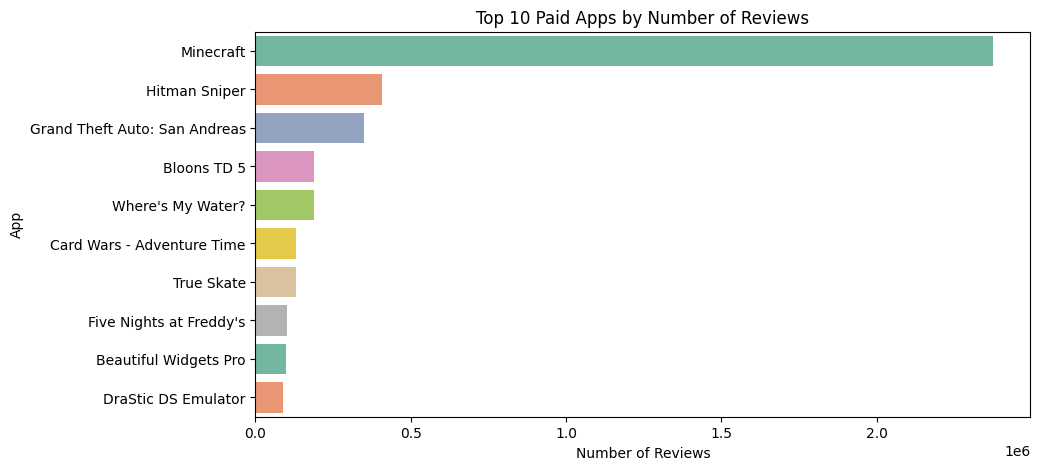

In [80]:
paid_apps = price_df[price_df['Price($)']>0]
top_paid_apps = paid_apps.sort_values('number_of_reviews', ascending = False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x='number_of_reviews', y='App', data=top_paid_apps, palette='Set2')
plt.title('Top 10 Paid Apps by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('App')
plt.show()

## Top Free Apps
* These are mostly of communication and social category.
* WIth facebook leading the pack.

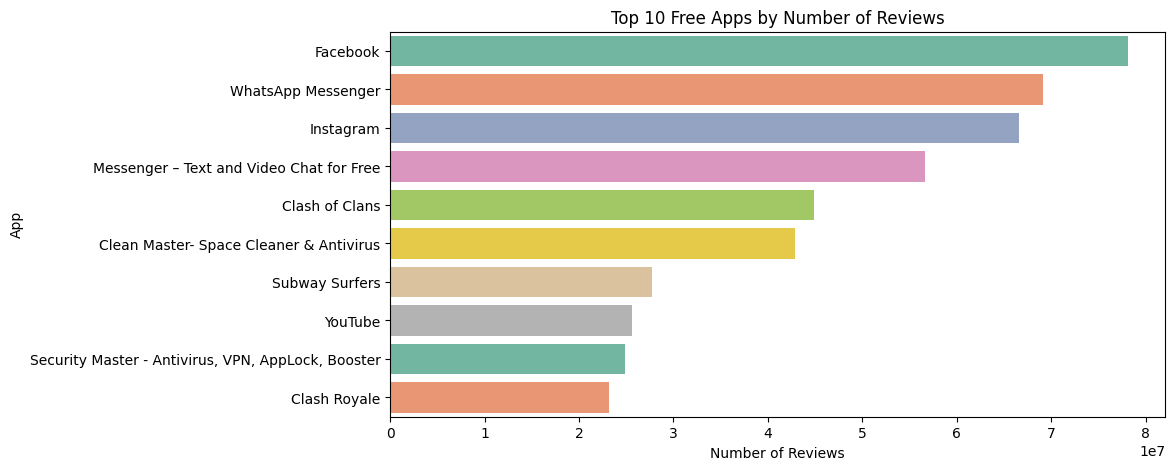

In [82]:
free_apps = price_df[price_df['Price($)'] ==0]
top_free_apps = free_apps.sort_values('number_of_reviews', ascending = False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x='number_of_reviews', y='App', data=top_free_apps, palette='Set2')
plt.title('Top 10 Free Apps by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('App')
plt.show()

In [25]:
top_apps_reviews.sort_values('Rating', ascending = False).head(10)

,App,Category,Rating,number_of_reviews,Size(Mb),Installs,Type,Price($),Content Rating,Genres
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526.0,0.0,"500,000,000+",Free,0.0,Everyone,Tools
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999.0,0.0,"500,000,000+",Free,0.0,Everyone,Tools
1670,Clash of Clans,GAME,4.6,44891723.0,98.0,"100,000,000+",Free,0.0,Everyone 10+,Strategy
1660,Clash Royale,GAME,4.6,23133508.0,97.0,"100,000,000+",Free,0.0,Everyone 10+,Strategy
4568,"360 Security - Free Antivirus, Booster, Cleaner",TOOLS,4.6,16771865.0,0.0,"100,000,000+",Free,0.0,Everyone,Tools
1675,8 Ball Pool,GAME,4.5,14198297.0,52.0,"100,000,000+",Free,0.0,Everyone,Sports
2545,Instagram,SOCIAL,4.5,66577313.0,0.0,"1,000,000,000+",Free,0.0,Teen,Social
3239,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759663.0,15.0,"100,000,000+",Free,0.0,Everyone,Tools
1654,Subway Surfers,GAME,4.5,27722264.0,76.0,"1,000,000,000+",Free,0.0,Everyone 10+,Arcade
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922.0,40.0,"500,000,000+",Free,0.0,Teen,Communication


In [26]:
google.columns

Index(['App', 'Category', 'Rating', 'number_of_reviews', 'Size(Mb)',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [27]:
google['Installs'] = google['Installs'].str.replace(',', '').str.replace('+', '').astype(float)

In [28]:
google['Category'].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

## Startified Sampling
* Here we have seen that each category have unequal number of rows, and that's why any category wise analysis we do will be biased.
* To fix that We use a method called Stratified Sampling in which we take a sample from each category of the same number of apps.
* This sampling obtain samples that accurately reflect the diversity of the population they are studying, leading to more reliable and generalizable results.

In [29]:
def select_top_50(df):
    return df.nlargest(50, 'Installs')

top_50_apps_by_category = google.groupby('Category', group_keys=False).apply(select_top_50)

top_50_apps_by_category.reset_index(drop=True, inplace=True)

top_50_apps_by_category


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8484\3271640448.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_50_apps_by_category = google.groupby('Category', group_keys=False).apply(select_top_50)


,App,Category,Rating,number_of_reviews,Size(Mb),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
1,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829.0,20.0,10000000.0,Free,0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up
2,ibis Paint X,ART_AND_DESIGN,4.6,224399.0,31.0,10000000.0,Free,0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up
3,Textgram - write on photos,ART_AND_DESIGN,4.4,295221.0,0.0,10000000.0,Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
4,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.7,174531.0,24.0,10000000.0,Free,0,Everyone,Art & Design,"July 31, 2018",1.6.1,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,Météociel,WEATHER,4.5,29344.0,22.0,500000.0,Free,0,Everyone,Weather,"July 25, 2018",4.1.11 - Hegoa,4.1 and up
1646,Weather Live,WEATHER,4.5,76593.0,0.0,500000.0,Paid,$5.99,Everyone,Weather,"November 21, 2017",Varies with device,Varies with device
1647,GO Weather EX Theme White,WEATHER,4.2,8723.0,4.6,500000.0,Free,0,Everyone,Weather,"August 27, 2014",1.0,2.2 and up
1648,MIUI Style GO Weather EX,WEATHER,4.2,2115.0,1.1,500000.0,Free,0,Everyone,Weather,"July 4, 2014",1.3,1.6 and up


## Popular Categories based on Number of Installs
* We can consider popular categories based on either number of installs or number of reviews.
* Here we see Game as the top category with most number of accumulated installs followed by Communication, tools and productivity. 

In [76]:
def select_top_50(df):
    return df.nlargest(50, 'Installs')

top_50_apps_by_category = google.groupby('Category', group_keys=False).apply(select_top_50)

top_50_apps_by_category.reset_index(drop=True, inplace=True)

popular_categories = top_50_apps_by_category.groupby('Category')['Installs'].sum().reset_index()
sorted_popular_categories = popular_categories.sort_values('Installs', ascending = False).head(10)
top_categories = top_50_apps_by_category[top_50_apps_by_category['Category'].isin(sorted_popular_categories)]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8484\3635417812.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_50_apps_by_category = google.groupby('Category', group_keys=False).apply(select_top_50)


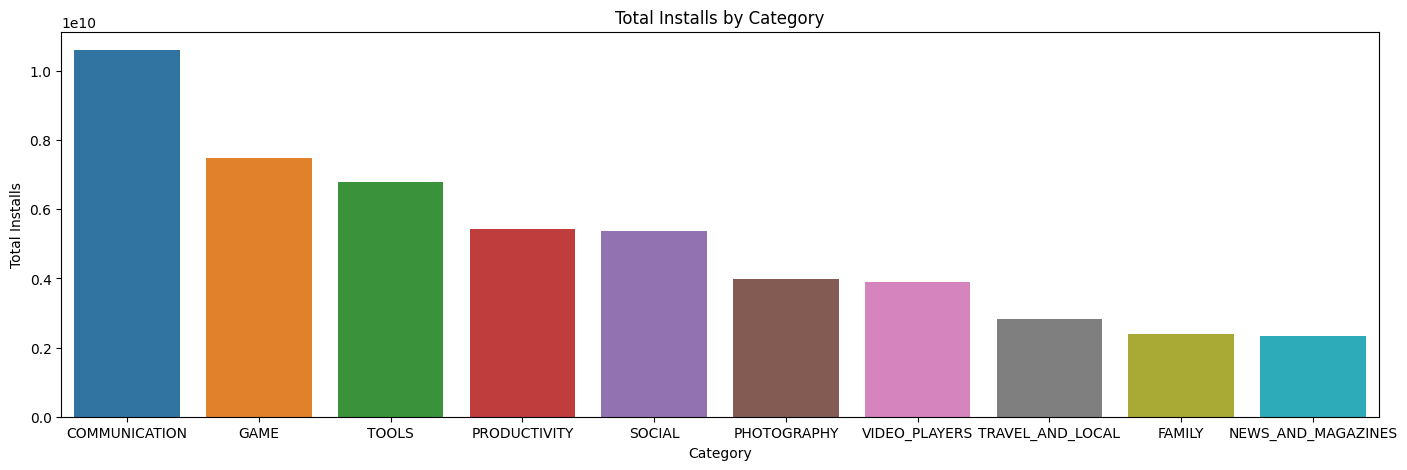

In [31]:
plt.figure(figsize=(17, 5))
sns.barplot(x='Category', y='Installs', data=sorted_popular_categories)
plt.title('Total Installs by Category')
plt.xticks(rotation=0) 
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.show()

## Top Categories Based on Average Rating
* Here we calculate average ratings for all categories and finally single out top 10 categories with highest average rating and top 10 categories with lowest average rating.
* There is not much of a disparity in case of categories with highest average rating with Health_and_Fitness at top followed by Education and Books_and_References.
* In the case of categories with lowest average rating we do come across a larger difference with Libraries_and_Demo being the category with the lowest average followed by Beauty and Events.

In [32]:
avg_ratings = top_50_apps_by_category.groupby('Category')['Rating'].mean().reset_index()
sorted_highest_avg = avg_ratings.sort_values('Rating', ascending = False).head(10)
sorted_lowest_avg =  avg_ratings.sort_values('Rating').head(10)

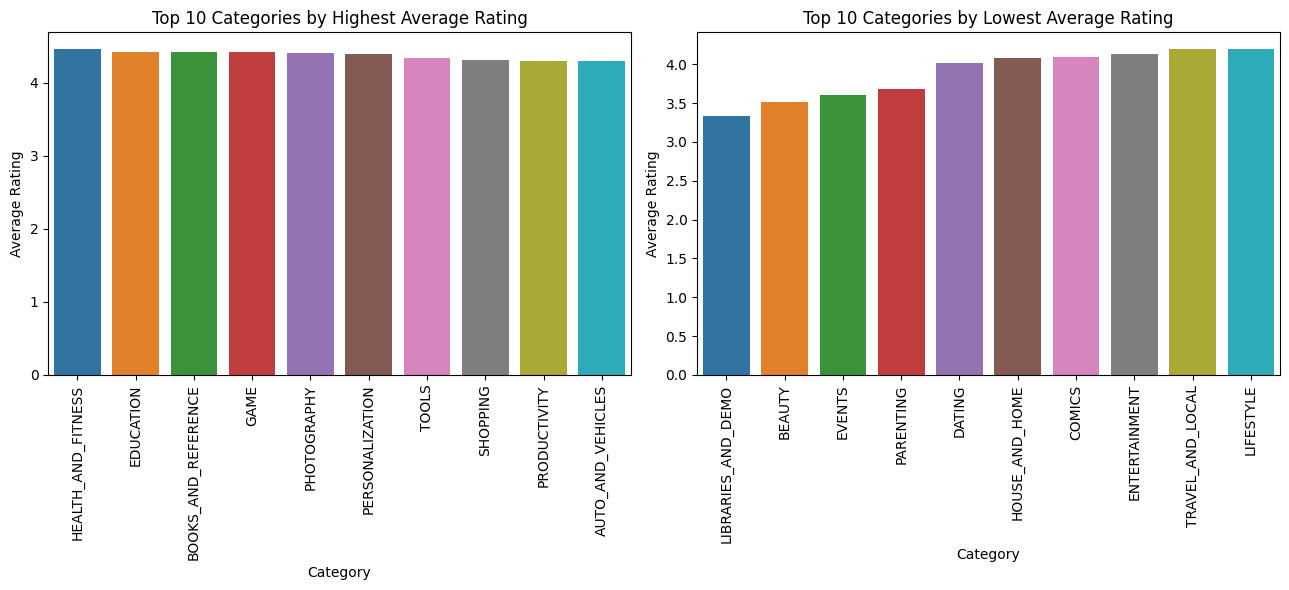

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

sns.barplot(x='Category', y='Rating', data=sorted_highest_avg, ax=axes[0])
axes[0].set_title('Top 10 Categories by Highest Average Rating')
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Average Rating')

sns.barplot(x='Category', y='Rating', data=sorted_lowest_avg, ax=axes[1])
axes[1].set_title('Top 10 Categories by Lowest Average Rating')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Average Rating')

plt.tight_layout()  
plt.show()

## Distribution App Size Across Different Categories
* The categories included are the top 10 categories by Installs.
* The Apps with maximum average size are in the Category Game. That means large-sized apps are the norm in this category.
* While the Median size in all other categories except FAMILY is fairly low.
* Most number of outliers are in the category Productivity and Social.

In [36]:
top_categories = top_50_apps_by_category[top_50_apps_by_category['Category'].isin(['COMMUNICATION', 'GAME', 'TOOLS', 'PRODUCTIVITY', 'SOCIAL','PHOTOGRAPHY', 'VIDEO_PLAYERS', 'TRAVEL_AND_LOCAL', 'FAMILY','NEWS_AND_MAGAZINES'])]

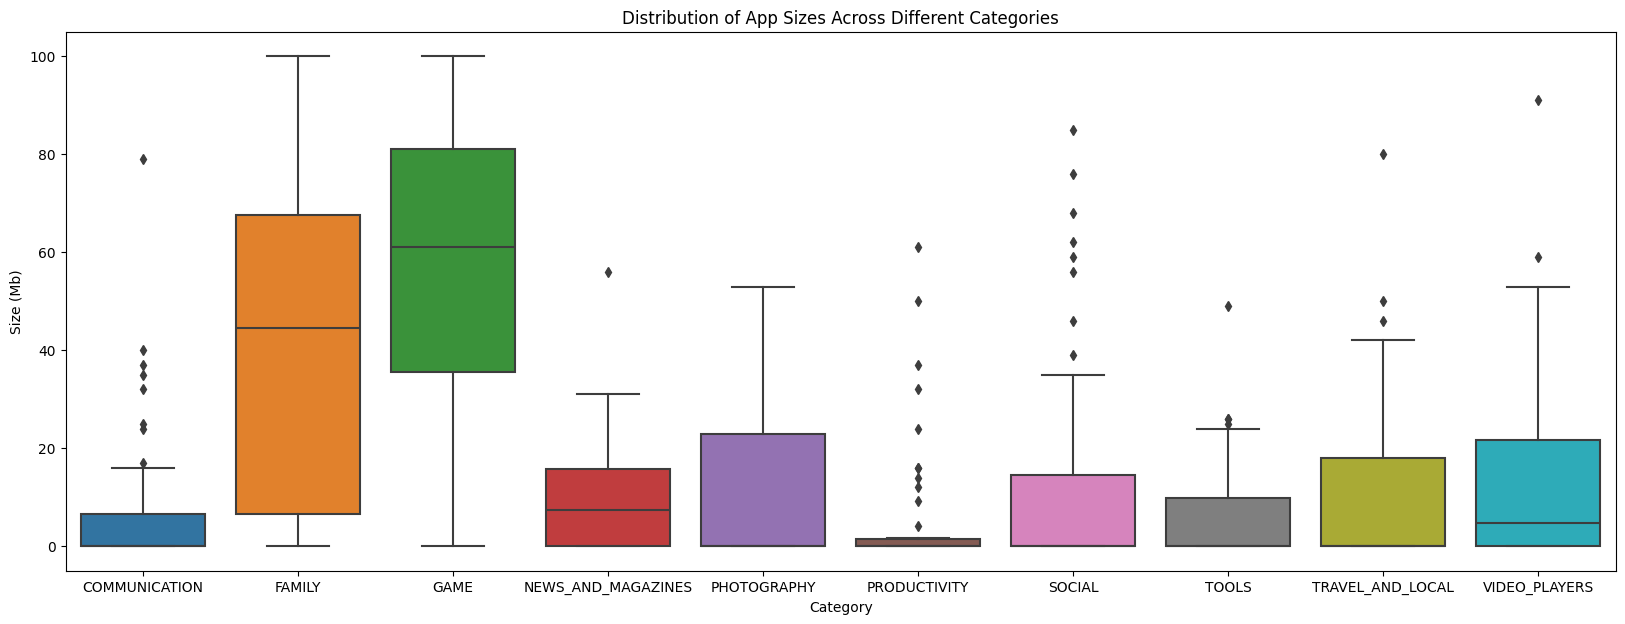

In [37]:
plt.figure(figsize=(20, 7))
sns.boxplot(x='Category', y='Size(Mb)', data=top_categories)
plt.title('Distribution of App Sizes Across Different Categories')
plt.xticks(rotation=0)  
plt.xlabel('Category')
plt.ylabel('Size (Mb)')
plt.show()

## Correlation between Installs and number of reviews
* We observe that the correlation coefficient between these two is 0.625 which is pretty close to 1.
* Overall, a correlation coefficient of 0.625 suggests a moderately strong positive relationship between the number of installs and the number of reviews.
* It means that with increasing installs, number of reviews also increases linearly with it.

In [38]:
data = google[['Installs', 'number_of_reviews']]

correlation = data.corr()
print("Correlation between Installs and Number of Reviews:")
print(correlation)

Correlation between Installs and Number of Reviews:
                   Installs  number_of_reviews
Installs           1.000000           0.625165
number_of_reviews  0.625165           1.000000


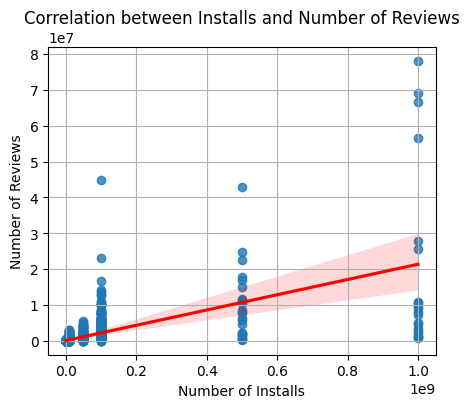

In [39]:
plt.figure(figsize=(5, 4))
sns.regplot(x='Installs', y='number_of_reviews', data=data, line_kws={"color": "red"})
plt.title('Correlation between Installs and Number of Reviews')
plt.xlabel('Number of Installs')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

## Top Apps in Each Category
* Here we make a function to find out top apps in each pouplar category or category with competition.
* The metric we use in determining the top apps is **number of reviews** instead of number of installs as it shows more engagement and we have seen a positive correlation between the two, so there is minimal chance of skewing the results.

In [85]:
def get_top_apps_by_category(df, category, column, top_n=5):
    category_df = df[df["Category"] == category]
    top_apps_category = category_df.sort_values(column, ascending=False)[['App', column]].head(top_n)
    return top_apps_category

In [86]:
top_apps_game = get_top_apps_by_category(google, 'GAME', 'number_of_reviews')
top_apps_communication = get_top_apps_by_category(google, 'COMMUNCATION', 'number_of_reviews')
top_apps_tools = get_top_apps_by_category(google, 'TOOLS', 'number_of_reviews')
top_apps_productivity = get_top_apps_by_category(google, 'PRODUCTIVITY', 'number_of_reviews')
top_apps_social = get_top_apps_by_category(google, 'SOCIAL', 'number_of_reviews')
top_apps_photography = get_top_apps_by_category(google, 'PHOTOGARPHY', 'number_of_reviews')

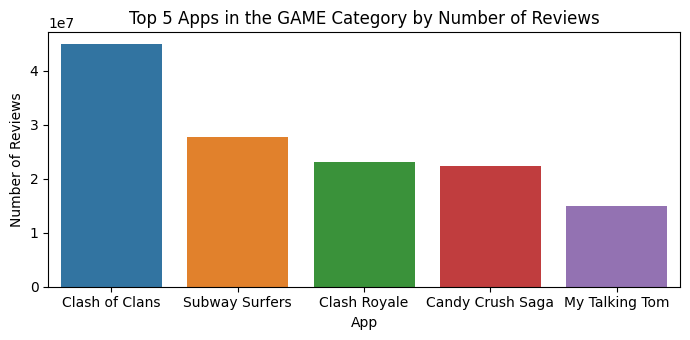

In [88]:
plt.figure(figsize=(7, 3.5))
sns.barplot(x='App', y='number_of_reviews', data=top_apps_game)

plt.title('Top 5 Apps in the GAME Category by Number of Reviews')
plt.xlabel('App')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0, ha='center') 
plt.tight_layout() 
plt.show()

## Function to plot Graphs For Each Category
* Here is a function to plot graphs ina more efficient way rather than having to write the entire code for each of the category 

In [53]:
def plot_top_apps_barplot(df, category, y_variable):
    top_apps = get_top_apps_by_category(df, category, y_variable)
    
    plt.figure(figsize=(12.5, 3.5))
    sns.barplot(x='App', y=y_variable, data=top_apps)
    for index, value in enumerate(top_apps[y_variable]):
        plt.text(index, value, str(value), ha='center', va='top')
    plt.title(f'Top 5 Apps in the {category} Category by {y_variable.capitalize()}')
    plt.xlabel('App')
    plt.ylabel(y_variable.capitalize())
    plt.xticks(rotation=0, ha='center') 
    plt.tight_layout() 
    plt.show()

In [ ]:
plot_top_apps_barplot(google, 'GAME', 'number_of_reviews')
plot_top_apps_barplot(google, 'COMMUNICATION', 'number_of_reviews')
plot_top_apps_barplot(google, 'TOOLS', 'number_of_reviews')
plot_top_apps_barplot(google, 'PRODUCTIVITY', 'number_of_reviews')
plot_top_apps_barplot(google, 'SOCIAL', 'number_of_reviews')
plot_top_apps_barplot(google, 'PHOTOGRAPHY', 'number_of_reviews')

## Correlation between rating and Size of the App
* The correlation coefficient in this case is -0.016, which is a very weak negative coefficient.
* It means that virtually there is no relation between the two.

In [56]:
data2 = google[['Rating', 'Size(Mb)']]
correlation = data2.corr()
print("Correlation between Rating and Size(Mb):")
print(correlation)

Correlation between Rating and Size(Mb):
            Rating  Size(Mb)
Rating    1.000000 -0.016358
Size(Mb) -0.016358  1.000000


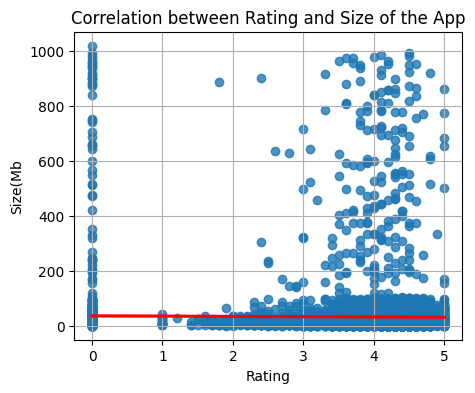

In [58]:
plt.figure(figsize=(5, 4))
sns.regplot(x='Rating', y='Size(Mb)', data=data2, line_kws={"color": "red"})
plt.title('Correlation between Rating and Size of the App')
plt.xlabel('Rating')
plt.ylabel('Size(Mb')
plt.grid(True)
plt.show()

In [59]:
def free_vs_paid_apps(df, category):
    category_df = df[df['Category'] == category]
    type_distribution = category_df['Type'].value_counts()
    return type_distribution

In [61]:
def free_vs_paid_apps(df, category):
    category_df = df[df['Category'] == category]
    type_distribution = category_df['Type'].value_counts()
    ratio_free_paid = type_distribution['Free'] / type_distribution.get('Paid', 0)
    return ratio_free_paid

## Ratio of Free vs Paid Apps in each Category
* The ratio of 10 in the category Game signifies that there are 10 times as many free apps as there are paid apps in the given category.
* The highest ratio is for the Category Communication, that is , 78 which is far above all the other categories.
* In other words, for every 1 paid app, there are 78 free apps available in that category. This indicates an overwhelming majority of free apps compared to paid ones in the category.

In [68]:
game = free_vs_paid_apps(google, "GAME")
print('Ratio of Free to paid apps in the category Game is' ,game)
social = free_vs_paid_apps(google, 'SOCIAL')
print('Ratio of Free to paid apps in the category Social is' ,social)
communication = free_vs_paid_apps(google, 'COMMUNICATION')
print('Ratio of Free to paid apps in the category Communication is' ,communication)
tools = free_vs_paid_apps(google, 'TOOLS')
print('Ratio of Free to paid apps in the category Tools is' ,tools)
productivity = free_vs_paid_apps(google, 'PRODUCTIVITY')
print('Ratio of Free to paid apps in the category Productivity is' ,productivity)

Ratio of Free to paid apps in the category Game is 10.695121951219512
Ratio of Free to paid apps in the category Social is 78.66666666666667
Ratio of Free to paid apps in the category Communication is 10.666666666666666
Ratio of Free to paid apps in the category Tools is 9.602564102564102
Ratio of Free to paid apps in the category Productivity is 12.357142857142858


## Do Paid Apps tend to have Higher rating than Free Apps?
* Here we observe that Free Apps tend to have higher rating as compared to Free Apps.
* But this is the result of the entire data which might have have a larger number of free apps and thus preventing fair calculation.
* That's why we take a sample of 100 from each Type and then calculate.
* And the new calculation reveals that paid apps have higher rating than the free apps.


In [69]:
ratings_avg = google.groupby('Type')['Rating'].mean().reset_index()
ratings_avg

,Type,Rating
0,0,0.000000
1,Free,3.553258
2,Paid,3.403175


In [74]:
free_apps = google[google['Type'] == 'Free'].sample(100)
paid_apps = google[google['Type']== 'Paid'].sample(100)
avg_rating = free_apps['Rating'].mean()
avg_rating2 = paid_apps['Rating'].mean()
print(avg_rating, avg_rating2)

3.3649999999999993 3.5860000000000003


## Optimal price range for paid apps in terms of maximizing revenue while maintaining competitiveness
* It reveals that the optimal Price for an app is $0.99
* And the maximum revenue you can generate is $291148457.79  

In [72]:
google['Price'] = google.Price.str.strip('$').astype(float)
paid_apps_df = google[google['Type'] == 'Paid']

paid_apps_df['Revenue'] = paid_apps_df['Price'] * paid_apps_df['Installs']
competitiveness_df = paid_apps_df[['App', 'Rating', 'number_of_reviews']]

price_points = [0.99, 1.99, 2.99, 3.99, 4.99, 5.99]  
revenue_by_price = {}
for price in price_points:
    paid_apps_df['Revenue'] = paid_apps_df['Price'] * paid_apps_df['Installs']
    total_revenue = paid_apps_df['Revenue'].sum()
    revenue_by_price[price] = total_revenue

optimal_price = max(revenue_by_price, key=revenue_by_price.get)
max_revenue = revenue_by_price[optimal_price]

print("Optimal Price for Maximizing Revenue:", optimal_price)
print("Maximum Revenue:", max_revenue)

Optimal Price for Maximizing Revenue: 0.99
Maximum Revenue: 291148457.79


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8484\3399675252.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_apps_df['Revenue'] = paid_apps_df['Price'] * paid_apps_df['Installs']
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8484\3399675252.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_apps_df['Revenue'] = paid_apps_df['Price'] * paid_apps_df['Installs']
